<a href="https://colab.research.google.com/github/hevendra630/ML_RESEACRH-_INTERNSHIP/blob/main/GDA_with_6data_points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test Predictions: [0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1
 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0]
Test Accuracy: 1.0


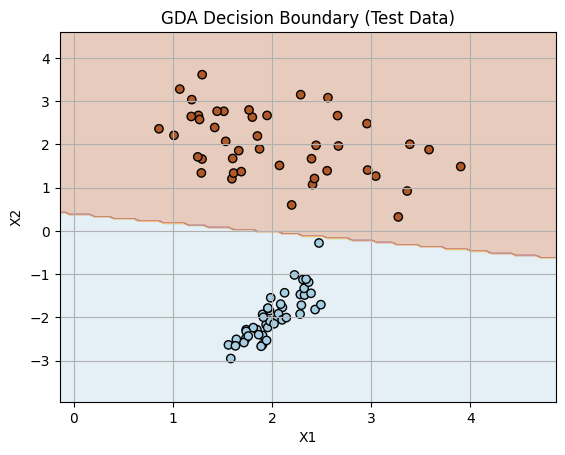

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Generate realistic synthetic data
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=2.0,
    random_state=42
)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 3: GDA training
phi = np.mean(y_train)
mu_0 = np.mean(X_train[y_train == 0], axis=0)
mu_1 = np.mean(X_train[y_train == 1], axis=0)
sigma = np.cov(X_train.T)
sigma_inv = np.linalg.inv(sigma)

# Step 4: GDA prediction function
def predict_gda(X):
    def g(x, mu):
        return -0.5 * x @ sigma_inv @ x.T + x @ sigma_inv @ mu.T - 0.5 * mu @ sigma_inv @ mu.T

    preds = []
    for x in X:
        p0 = g(x, mu_0) + np.log(1 - phi)
        p1 = g(x, mu_1) + np.log(phi)
        preds.append(1 if p1 > p0 else 0)
    return np.array(preds)

# Step 5: Predict on test set and evaluate
y_pred = predict_gda(X_test)
print("Test Predictions:", y_pred)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# Step 6: Plot decision boundary (on full data)
def plot_boundary(X, y, title="GDA Decision Boundary"):
    h = 0.05
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = predict_gda(grid).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid(True)
    plt.show()

# Step 7: Visualize with test data
plot_boundary(X_test, y_test, title="GDA Decision Boundary (Test Data)")
